In [1]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from torch import nn as nn
import matplotlib.pyplot as plt
import functools as Fntl
from functools import reduce
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
df1 = pd.read_csv("data/from_book/hour.csv")

In [3]:
df1

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [4]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### make 1-hot input features

In [9]:
pd.unique(df1['season'])

array([1, 2, 3, 4])

In [11]:
pd.unique(df1['mnth'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
pd.unique(df1['hr'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [13]:
pd.unique(df1['holiday'])

array([0, 1])

binary, keep as is

In [14]:
pd.unique(df1['weekday'])

array([6, 0, 1, 2, 3, 4, 5])

In [17]:
pd.unique(df1['workingday'])

array([0, 1])

binary, keep as is.

In [16]:
pd.unique(df1['weathersit'])

array([1, 2, 3, 4])

In [19]:
dummy_fields = ['season', 'mnth', 'hr', 'weekday', 'weathersit']

In [31]:
df_inp = Fntl.reduce(lambda acc, x: pd.concat([acc,
                                                pd.get_dummies(df1[x],
                                                               prefix=x,
                                                               drop_first=False)],
                                               axis=1),
                      dummy_fields,
                      pd.DataFrame())

In [32]:
df_inp

season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0             1         0         0         0       1       0       0       0   
1             1         0         0         0       1       0       0       0   
2             1         0         0         0       1       0       0       0   
3             1         0         0         0       1       0       0       0   
4             1         0         0         0       1       0       0       0   
...         ...       ...       ...       ...     ...     ...     ...     ...   
17374         1         0         0         0       0       0       0       0   
17375         1         0         0         0       0       0       0       0   
17376         1         0         0         0       0       0       0       0   
17377         1         0         0         0       0       0       0       0   
17378         1         0         0         0       0       0       0       0   

       mnth_5  mnth_6  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0           0       0  ...          0          0          0          0   
1           0       0  ...          0          0          0          0   
2           0       0  ...          0          0          0          0   
3           0       0  ...          0          0          0          0   
4           0       0  ...          0          0          0          0   
...       ...     ...  ...        ...        ...        ...        ...   
17374       0       0  ...          1          0          0          0   
17375       0       0  ...          1          0          0          0   
17376       0       0  ...          1          0          0          0   
17377       0       0  ...          1          0          0          0   
17378       0       0  ...          1          0          0          0   

       weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  \
0              0          1             1             0             0   
1              0          1             1             0             0   
2              0          1             1             0             0   
3              0          1             1             0             0   
4              0          1             1             0             0   
...          ...        ...           ...           ...           ...   
17374          0          0             0             1             0   
17375          0          0             0             1             0   
17376          0          0             1             0             0   
17377          0          0             1             0             0   
17378          0          0             1             0             0   

       weathersit_4  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17374             0  
17375             0  
17376             0  
17377             0  
17378             0  

[17379 rows x 51 columns]

In [33]:
df_inp.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

#### inclue binary features

In [34]:
binary_fields = ['holiday', 'workingday']

In [35]:
df_inp = Fntl.reduce(lambda acc, x: pd.concat([acc, df1[x]],
                                               axis=1),
                      binary_fields,
                      df_inp)

In [36]:
df_inp

season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0             1         0         0         0       1       0       0       0   
1             1         0         0         0       1       0       0       0   
2             1         0         0         0       1       0       0       0   
3             1         0         0         0       1       0       0       0   
4             1         0         0         0       1       0       0       0   
...         ...       ...       ...       ...     ...     ...     ...     ...   
17374         1         0         0         0       0       0       0       0   
17375         1         0         0         0       0       0       0       0   
17376         1         0         0         0       0       0       0       0   
17377         1         0         0         0       0       0       0       0   
17378         1         0         0         0       0       0       0       0   

       mnth_5  mnth_6  ...  weekday_3  weekday_4  weekday_5  weekday_6  \
0           0       0  ...          0          0          0          1   
1           0       0  ...          0          0          0          1   
2           0       0  ...          0          0          0          1   
3           0       0  ...          0          0          0          1   
4           0       0  ...          0          0          0          1   
...       ...     ...  ...        ...        ...        ...        ...   
17374       0       0  ...          0          0          0          0   
17375       0       0  ...          0          0          0          0   
17376       0       0  ...          0          0          0          0   
17377       0       0  ...          0          0          0          0   
17378       0       0  ...          0          0          0          0   

       weathersit_1  weathersit_2  weathersit_3  weathersit_4  holiday  \
0                 1             0             0             0        0   
1                 1             0             0             0        0   
2                 1             0             0             0        0   
3                 1             0             0             0        0   
4                 1             0             0             0        0   
...             ...           ...           ...           ...      ...   
17374             0             1             0             0        0   
17375             0             1             0             0        0   
17376             1             0             0             0        0   
17377             1             0             0             0        0   
17378             1             0             0             0        0   

       workingday  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
17374           1  
17375           1  
17376           1  
17377           1  
17378           1  

[17379 rows x 53 columns]

In [37]:
df_inp.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'holiday',
       'workingday'],
      dtype='object')

#### normalize the quantitative data

In [38]:
qnt_fields = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [39]:
feature_statistics = {}
df_qnt = pd.DataFrame()
for k in qnt_fields:
    mean, std = (df1[k].mean(), df1[k].std())
    feature_statistics[k] = (mean, std)
    df_qnt[k] = (df1[k] - mean) / std

In [40]:
df_qnt

temp     atemp       hum  windspeed    casual  registered       cnt
0     -1.334609 -1.093249  0.947345  -1.553844 -0.662736   -0.930162 -0.956312
1     -1.438475 -1.181698  0.895513  -1.553844 -0.561326   -0.804632 -0.823998
2     -1.438475 -1.181698  0.895513  -1.553844 -0.622172   -0.837666 -0.868103
3     -1.334609 -1.093249  0.636351  -1.553844 -0.662736   -0.949983 -0.972851
4     -1.334609 -1.093249  0.636351  -1.553844 -0.723582   -1.009445 -1.039008
...         ...       ...       ...        ...       ...         ...       ...
17374 -1.230743 -1.269565 -0.141133  -0.211685 -0.500481   -0.302509 -0.388467
17375 -1.230743 -1.269565 -0.141133  -0.211685 -0.561326   -0.480894 -0.553859
17376 -1.230743 -1.269565 -0.141133  -0.211685 -0.581608   -0.467681 -0.548346
17377 -1.230743 -1.181698 -0.348463  -0.456086 -0.459917   -0.698922 -0.708224
17378 -1.230743 -1.181698  0.118028  -0.456086 -0.480199   -0.771597 -0.774381

[17379 rows x 7 columns]

#### add quantitative data into df_inp & df_tgt

In [41]:
qnt_features = ['temp', 'atemp', 'hum', 'windspeed']
qnt_tgts = ['casual', 'registered', 'cnt']

In [42]:
df_inp = pd.concat([df_inp, df_qnt[qnt_features]],
                   axis=1)

In [43]:
df_inp

season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0             1         0         0         0       1       0       0       0   
1             1         0         0         0       1       0       0       0   
2             1         0         0         0       1       0       0       0   
3             1         0         0         0       1       0       0       0   
4             1         0         0         0       1       0       0       0   
...         ...       ...       ...       ...     ...     ...     ...     ...   
17374         1         0         0         0       0       0       0       0   
17375         1         0         0         0       0       0       0       0   
17376         1         0         0         0       0       0       0       0   
17377         1         0         0         0       0       0       0       0   
17378         1         0         0         0       0       0       0       0   

       mnth_5  mnth_6  ...  weathersit_1  weathersit_2  weathersit_3  \
0           0       0  ...             1             0             0   
1           0       0  ...             1             0             0   
2           0       0  ...             1             0             0   
3           0       0  ...             1             0             0   
4           0       0  ...             1             0             0   
...       ...     ...  ...           ...           ...           ...   
17374       0       0  ...             0             1             0   
17375       0       0  ...             0             1             0   
17376       0       0  ...             1             0             0   
17377       0       0  ...             1             0             0   
17378       0       0  ...             1             0             0   

       weathersit_4  holiday  workingday      temp     atemp       hum  \
0                 0        0           0 -1.334609 -1.093249  0.947345   
1                 0        0           0 -1.438475 -1.181698  0.895513   
2                 0        0           0 -1.438475 -1.181698  0.895513   
3                 0        0           0 -1.334609 -1.093249  0.636351   
4                 0        0           0 -1.334609 -1.093249  0.636351   
...             ...      ...         ...       ...       ...       ...   
17374             0        0           1 -1.230743 -1.269565 -0.141133   
17375             0        0           1 -1.230743 -1.269565 -0.141133   
17376             0        0           1 -1.230743 -1.269565 -0.141133   
17377             0        0           1 -1.230743 -1.181698 -0.348463   
17378             0        0           1 -1.230743 -1.181698  0.118028   

       windspeed  
0      -1.553844  
1      -1.553844  
2      -1.553844  
3      -1.553844  
4      -1.553844  
...          ...  
17374  -0.211685  
17375  -0.211685  
17376  -0.211685  
17377  -0.456086  
17378  -0.456086  

[17379 rows x 57 columns]

In [44]:
df_inp.columns

Index(['season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'holiday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [45]:
df_tgt = df_qnt['cnt']

In [46]:
df_tgt

0       -0.956312
1       -0.823998
2       -0.868103
3       -0.972851
4       -1.039008
           ...   
17374   -0.388467
17375   -0.553859
17376   -0.548346
17377   -0.708224
17378   -0.774381
Name: cnt, Length: 17379, dtype: float64

#### make the train/test inp/tgt tensors

In [47]:
train_x = torch.tensor(df_inp[:-21*24].values).float()
test_x = torch.tensor(df_inp[-21*24:].values).float()

In [48]:
train_x.shape

torch.Size([16875, 57])

In [49]:
test_x.shape

torch.Size([504, 57])

In [51]:
tsr_tgt = torch.tensor(df_tgt.values.reshape(len(df_tgt),1)).float()

In [54]:
train_y = tsr_tgt[:-21*24,:]

In [55]:
test_y = tsr_tgt[-21*24:,:]

In [56]:
train_y.shape

torch.Size([16875, 1])

In [57]:
test_y.shape

torch.Size([504, 1])

### Make DataSet Object

In [58]:
class BSDataset(Dataset):
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys
    def __len__(self):
        return self.xs.shape[0]
    def __getitem__(self, id):
        return self.xs[id], self.ys[id]

In [59]:
train_set = BSDataset(train_x, train_y)

In [60]:
test_set = BSDataset(test_x, test_y)

In [61]:
batch_size = 128

In [62]:
train_dataloader = DataLoader(train_set, batch_size=batch_size)
test_dataloader = DataLoader(test_set, batch_size=batch_size)

### Make model

In [63]:
class BSModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BSModel, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid(),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, inp):
        return self.stack(inp)

In [64]:
inp_size = train_x.shape[1]
hidden_size = 10
output_size = 1

In [65]:
md0 = BSModel(inp_size, hidden_size, output_size)

### Make the train / test functions

In [66]:
optimizer = optim.SGD(md0.parameters(), lr=0.01)

In [67]:
loss_fn = nn.MSELoss()

In [68]:
def train_epoch(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>8d}/{size:>8d}]")
    return loss

In [98]:
def trn_epoches(tot_epoches, model, loss_fn, dataloader, optimizer):
    losses = []
    for i in range(tot_epoches):
        loss = train_epoch(dataloader, model, loss_fn, optimizer)
        losses.append(loss)
        if i % 200 == 0:
            print(f"epoch {i:>6d}/{tot_epoches:>6d}, loss: {loss:>7f}")
    return losses
        

In [70]:
def test_loop(model, xs, ys, loss_fn):
    with torch.no_grad():
        pred = model(xs)
        test_loss = loss_fn(pred, ys).item()
    print(f"loss: {test_loss:>8f} \n")
    return pred

### Training

In [71]:
loss_hist = trn_epoches(1000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/  1000, loss: 0.848422

epoch    200/  1000, loss: 0.270695

epoch    400/  1000, loss: 0.131978

epoch    600/  1000, loss: 0.097693

epoch    800/  1000, loss: 0.098435


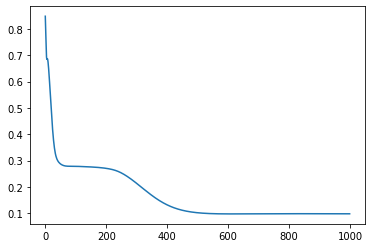

In [72]:
plt.plot(loss_hist)

### check train cycle 1

In [77]:
pred_train = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.234949 



Pred vs test data (normalized)

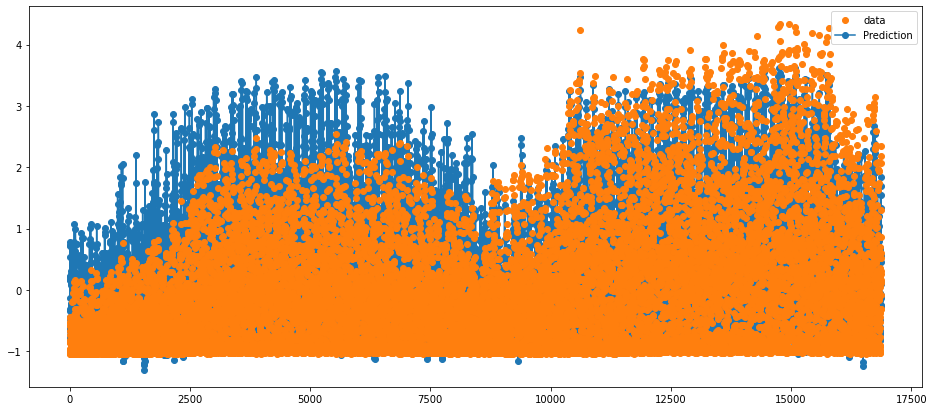

In [78]:
plt.figure(figsize = (16, 7))
#x_data = df_inp_test.reset_index()['index']
pred_data = pred_train.numpy()
tgt_data = train_y.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [79]:
loss_hist_2 = trn_epoches(1000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/  1000, loss: 0.098126

epoch    200/  1000, loss: 0.097160

epoch    400/  1000, loss: 0.095890

epoch    600/  1000, loss: 0.094509

epoch    800/  1000, loss: 0.093154


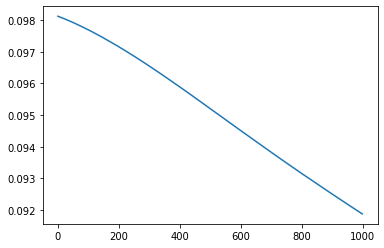

In [80]:
plt.plot(loss_hist_2)

In [81]:
pred_train_2 = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.230061 



In [88]:
tgt_data_train = train_y.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

In [90]:
tgt_data_test = df1['cnt'][-21*24:].values

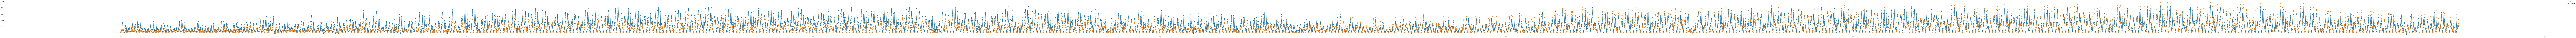

In [89]:
plt.figure(figsize = (500, 7))
#x_data = df_inp_test.reset_index()['index']
pred_data = pred_train_2.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data_train, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [73]:
pred = test_loop(md0, test_x, test_y, loss_fn)

loss: 0.121414 



In [93]:
pred_data_test2 = pred.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

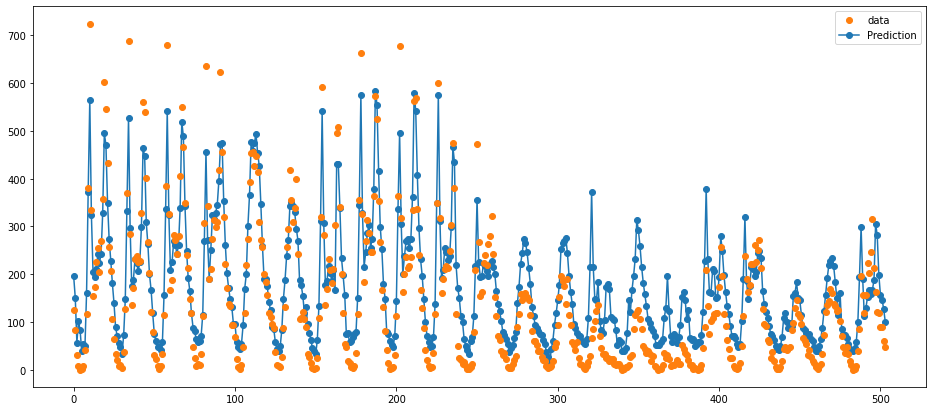

In [94]:
plt.figure(figsize = (16, 7))
#x_data = df_inp_test.reset_index()['index']
pred_plot, = plt.plot(pred_data_test2, 'o-')
cnt_plot, = plt.plot(tgt_data_test, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

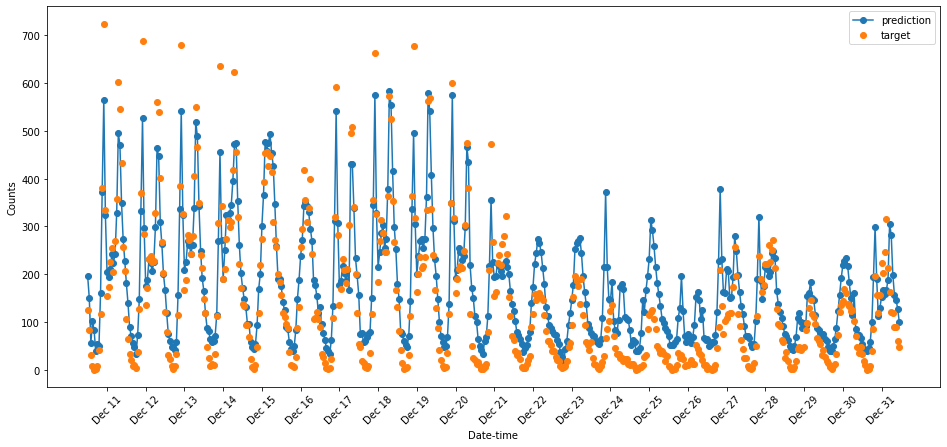

In [96]:
fig, ax = plt.subplots(figsize = (16, 7))


x_data = df_inp[-21*24:].reset_index()['index']

ax.plot(pred_data_test2, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [97]:
loss_hist_3 = trn_epoches(10000, md0,loss_fn, train_dataloader,optimizer)


epoch      0/ 10000, loss: 0.091867

epoch    200/ 10000, loss: 0.090632

epoch    400/ 10000, loss: 0.089437

epoch    600/ 10000, loss: 0.088296

epoch    800/ 10000, loss: 0.087225

epoch   1000/ 10000, loss: 0.086222

epoch   1200/ 10000, loss: 0.085277

epoch   1400/ 10000, loss: 0.084385

epoch   1600/ 10000, loss: 0.083550

epoch   1800/ 10000, loss: 0.082778

epoch   2000/ 10000, loss: 0.082078

epoch   2200/ 10000, loss: 0.081445

epoch   2400/ 10000, loss: 0.080877

epoch   2600/ 10000, loss: 0.080368

epoch   2800/ 10000, loss: 0.079910

epoch   3000/ 10000, loss: 0.079499

epoch   3200/ 10000, loss: 0.079130

epoch   3400/ 10000, loss: 0.078800

epoch   3600/ 10000, loss: 0.078505

epoch   3800/ 10000, loss: 0.078243

epoch   4000/ 10000, loss: 0.078013

epoch   4200/ 10000, loss: 0.077812

epoch   4400/ 10000, loss: 0.077641

epoch   4600/ 10000, loss: 0.077496

epoch   4800/ 10000, loss: 0.077378

epoch   5000/ 10000, loss: 0.077283

epoch   5200/ 10000, loss: 0.077208



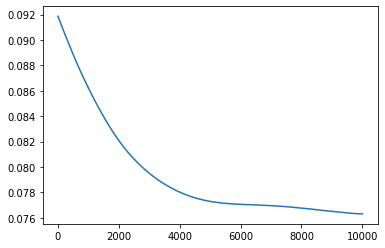

In [99]:
plt.plot(loss_hist_3)

In [100]:
pred_train_3 = test_loop(md0, train_x, train_y, loss_fn)

loss: 0.238708 



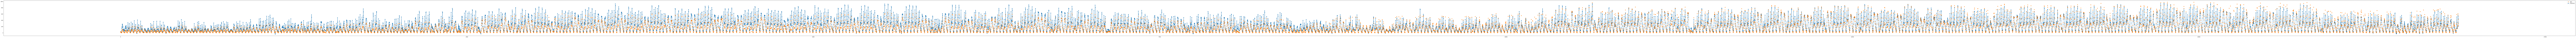

In [101]:
plt.figure(figsize = (500, 7))
pred_data = pred_train_3.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data_train, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [103]:
pred_test3 = test_loop(md0, test_x, test_y, loss_fn)

loss: 0.113562 



In [105]:
pred_data_test3 = pred_test3.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

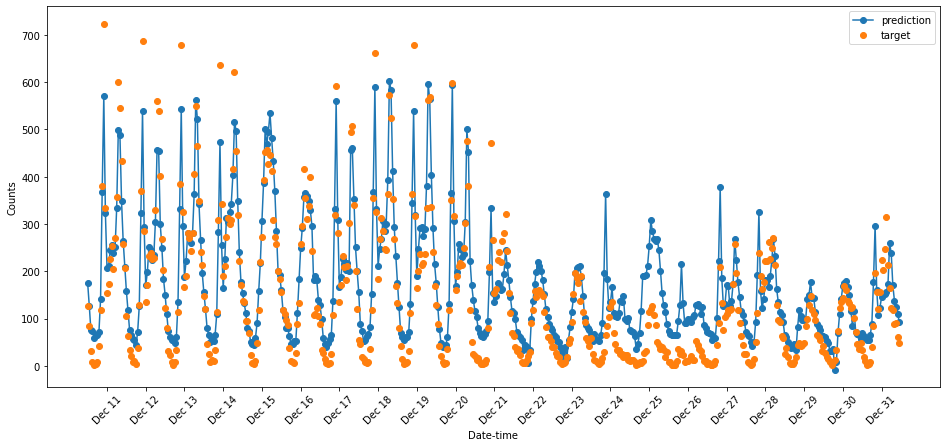

In [107]:
fig, ax = plt.subplots(figsize = (16, 7))
x_data = df_inp[-21*24:].reset_index()['index']

ax.plot(pred_data_test3, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)